# Digital Transformation [Banking]


## Business Objective

Bank XYZ has a growing customer base where the majority of them are liability customers (depositors) vs. borrowers (asset customers). The bank is interested in expanding the borrower’s base rapidly to bring in more business via loan interests.
A campaign that the bank ran in the last quarter showed an average single-digit conversion rate. In the last town hall, the marketing head mentioned that digital transformation is the core strength of the business strategy, how to devise effective campaigns with better target marketing to increase the conversion ratio to double-digit with the same budget as per the last campaign.
As a data scientist, you are asked to develop a machine learning model to identify potential borrowers to support focused marketing.

## Importing libraries

In [1]:
import pandas as pd #data manipulation
import numpy as np #mathematical operations
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
import seaborn as sns #visualisation
pd.set_option('display.max_rows',None) #display max rows
pd.set_option('display.max_columns',None) #display max columns
import warnings
warnings.filterwarnings("ignore")

## Load the Dataset

In [2]:
data1=pd.read_csv('Data1.csv') #read data1
data2=pd.read_csv('Data2.csv') #read data2

In [3]:
data1.head() #top 5 values of data1

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [4]:
data2.head()  #top 5 values of data2

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [5]:
data=data2.merge(data1,how='left',on='ID') #Merging data2 and data1 on common column 'ID'

In [6]:
data.head() #top 5 values after merging

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0         NaN   25              1            49    91107            4   
1         NaN   45             19            34    90089            3   
2         NaN   39             15            11    94720            1   
3         NaN   35              9           100    94112            1   
4         NaN   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [7]:
data.info() #checking type of data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
 7   Age                  5000 non-null   int64  
 8   CustomerSince        5000 non-null   int64  
 9   HighestSpend         5000 non-null   int64  
 10  ZipCode              5000 non-null   int64  
 11  HiddenScore          5000 non-null   int64  
 12  MonthlyAverageSpend  5000 non-null   float64
 13  Level                5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [8]:
data.shape #checking shpe of dataframe

(5000, 14)

In [9]:
data.isnull().sum() #checking null values

ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
dtype: int64

In [10]:
data['LoanOnCard'].fillna(data['LoanOnCard'].median(),inplace=True) #imuting null values

In [11]:
data.head() #top 5 values

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0         0.0   25              1            49    91107            4   
1         0.0   45             19            34    90089            3   
2         0.0   39             15            11    94720            1   
3         0.0   35              9           100    94112            1   
4         0.0   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [12]:
data.isnull().sum() #checking null values

ID                     0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
dtype: int64

In [13]:
data.duplicated().sum() #checking for duplicated values

0

In [14]:
data.drop(['ID','ZipCode'],axis=1,inplace=True)

## Exploratory Data Analysis

### Heat Map

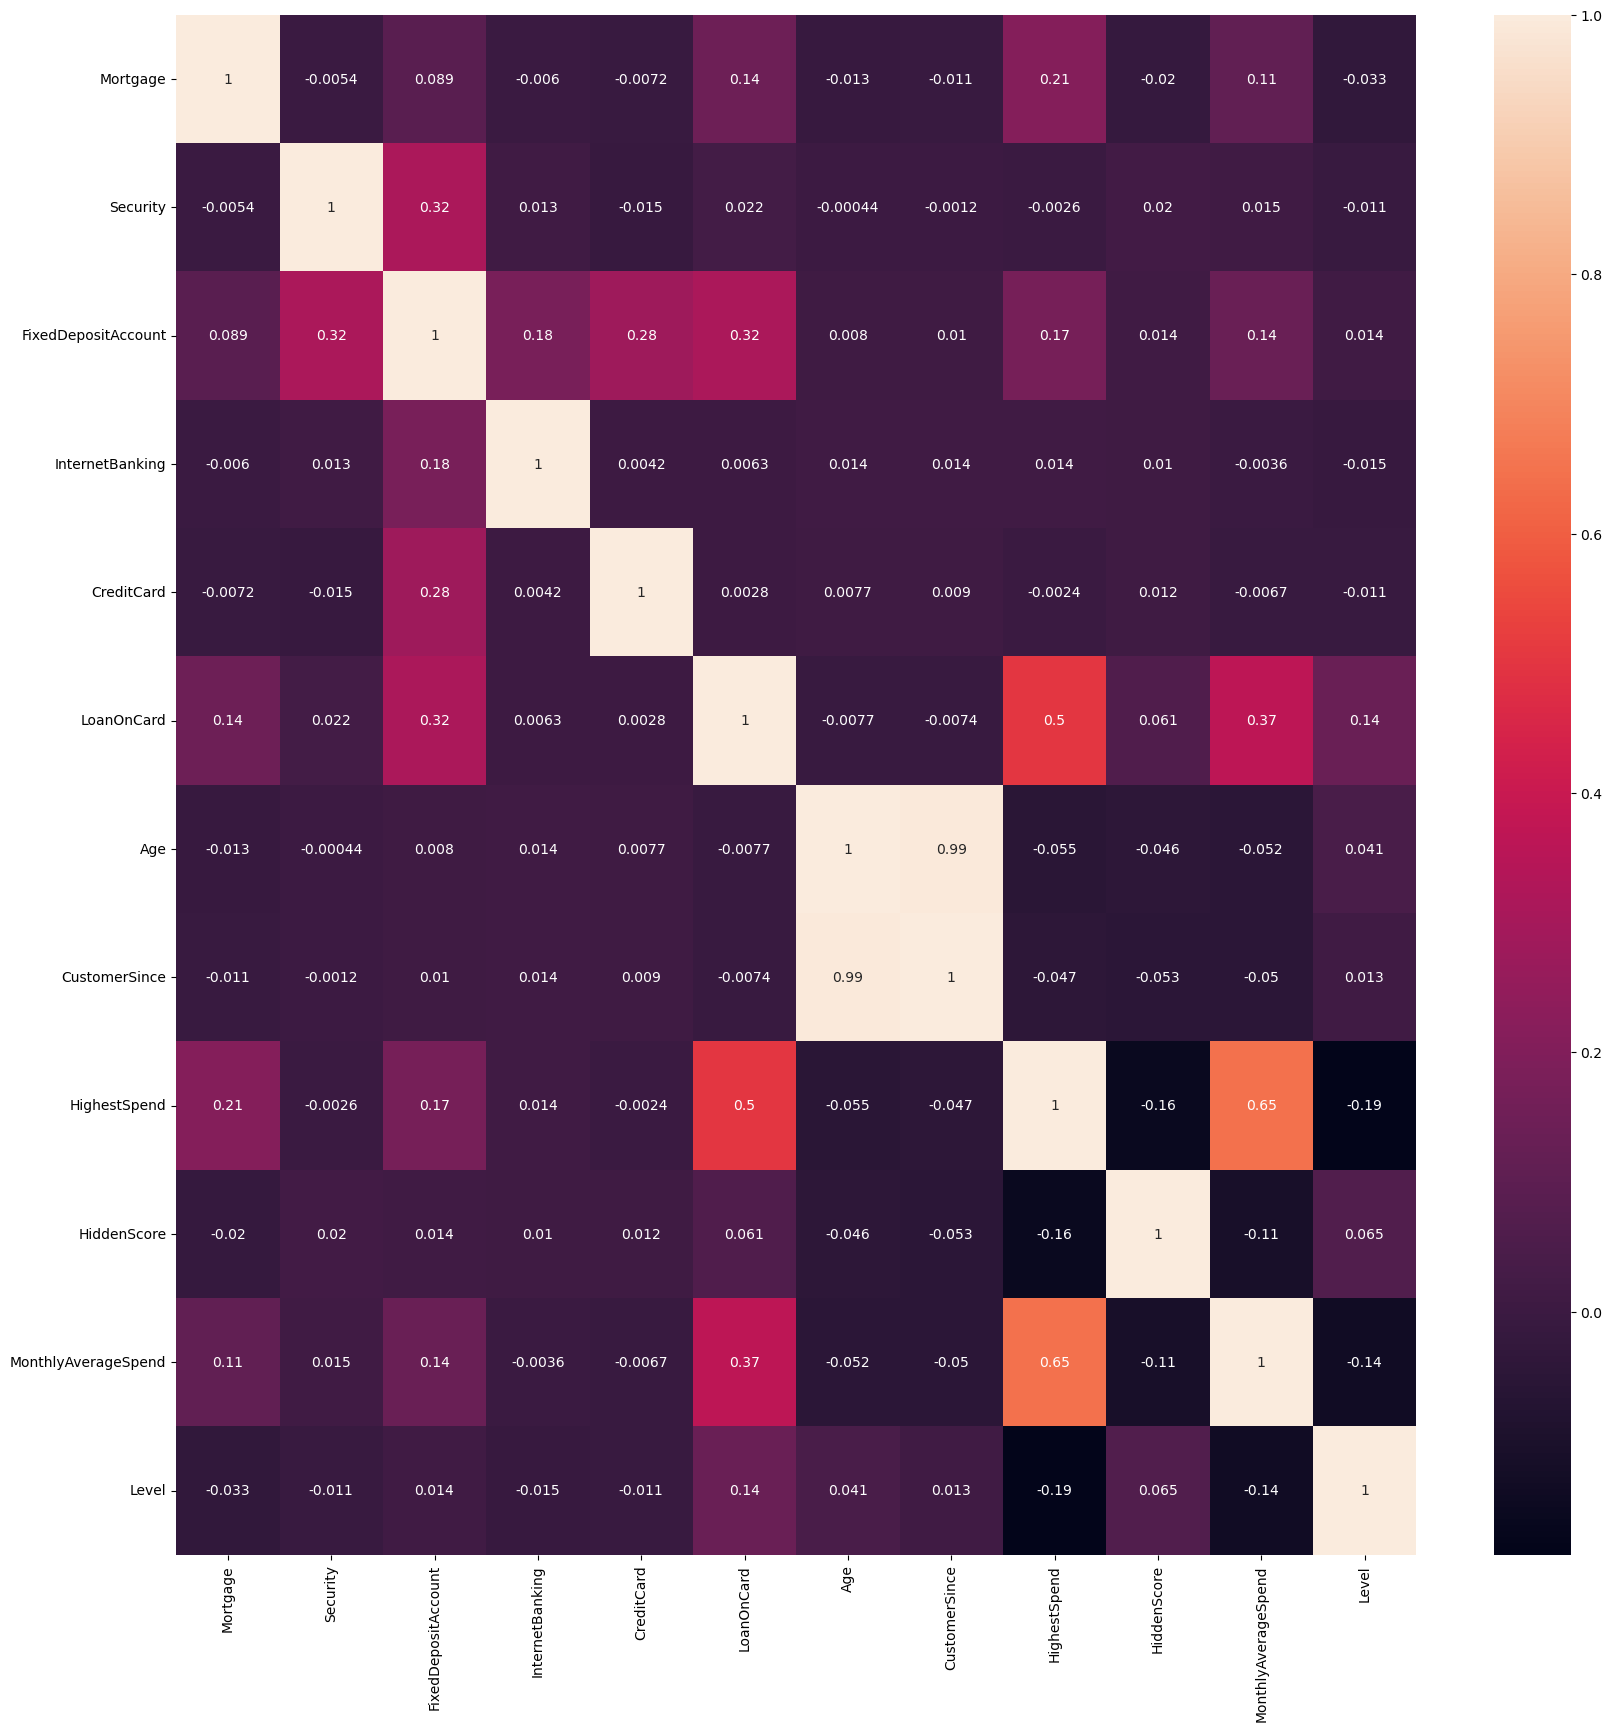

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

We observe from heat map that,

1.HighestSpend is moderatly corelated with LoanOnCard and MonthlyAverageSpend.

### Count Plot

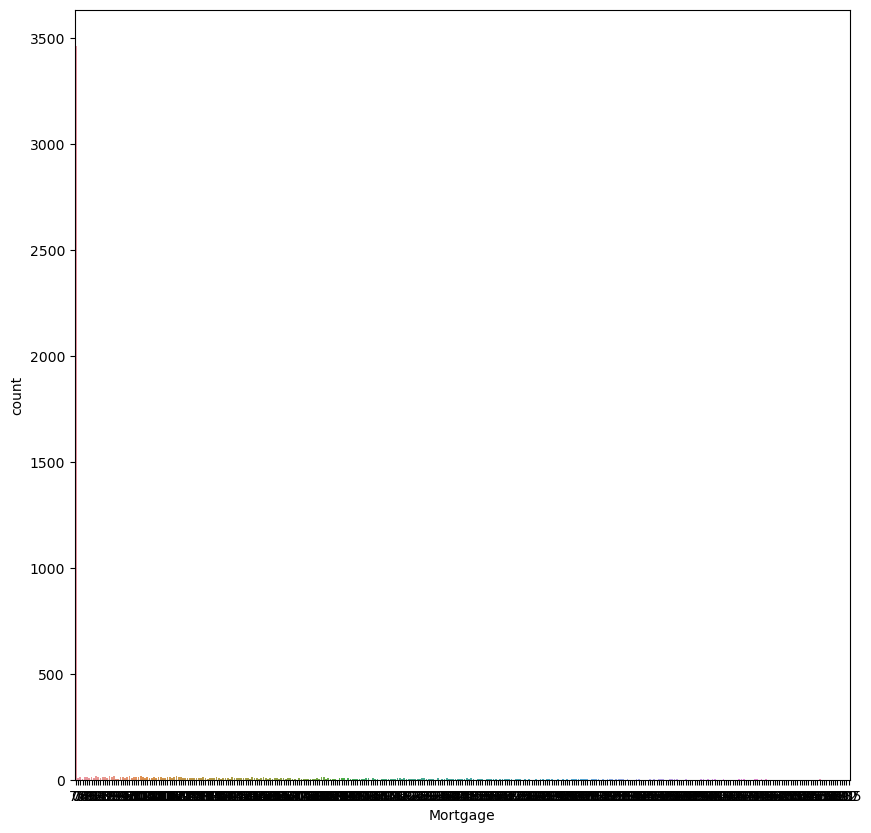

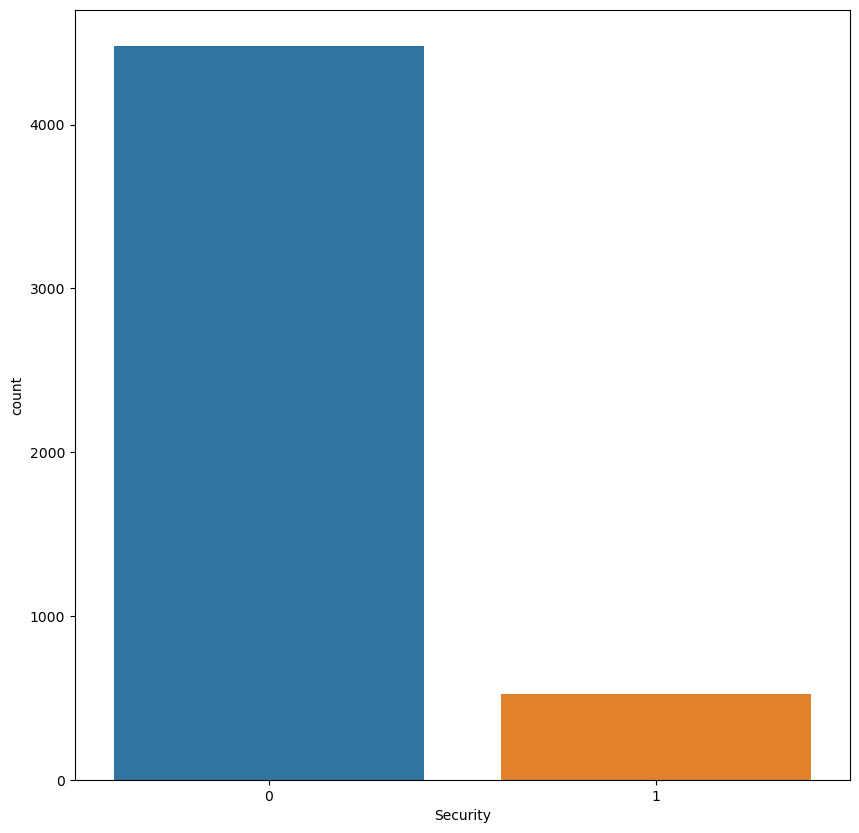

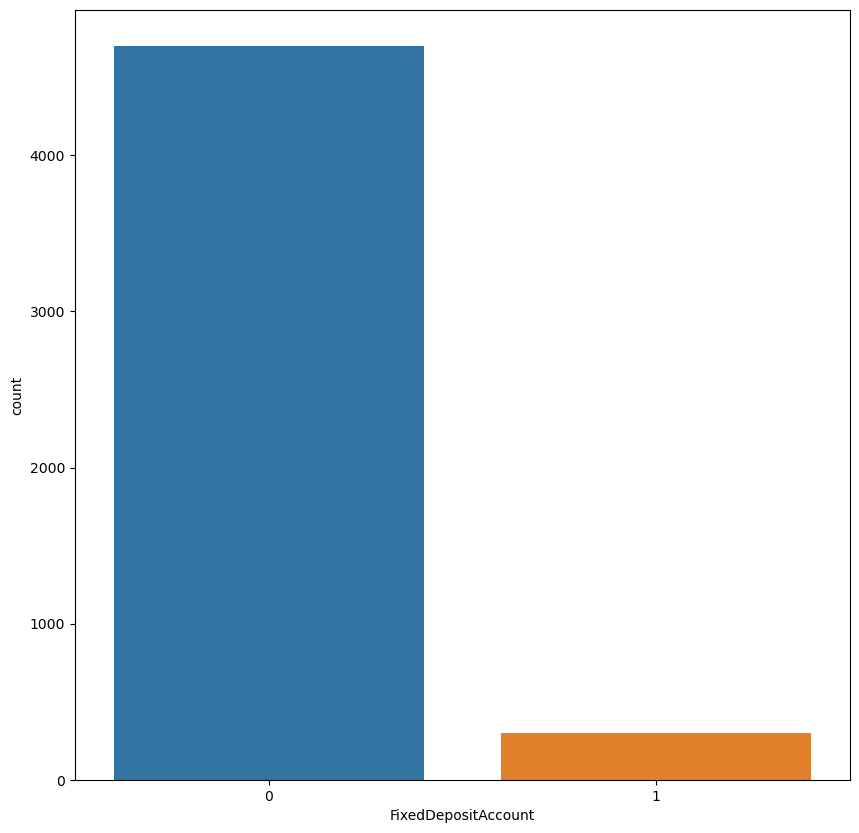

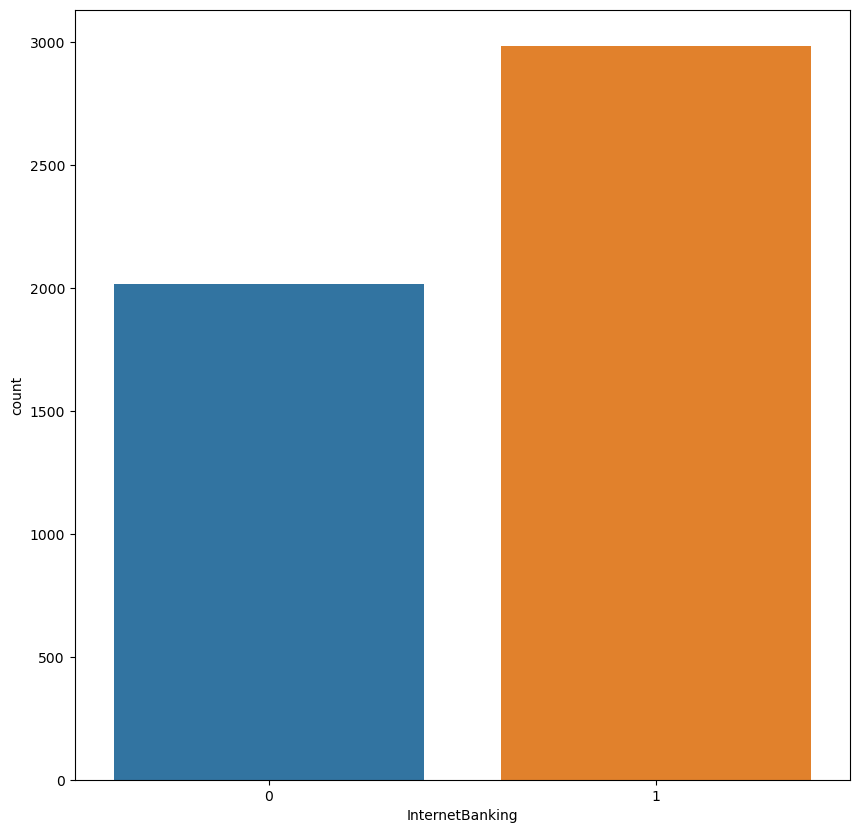

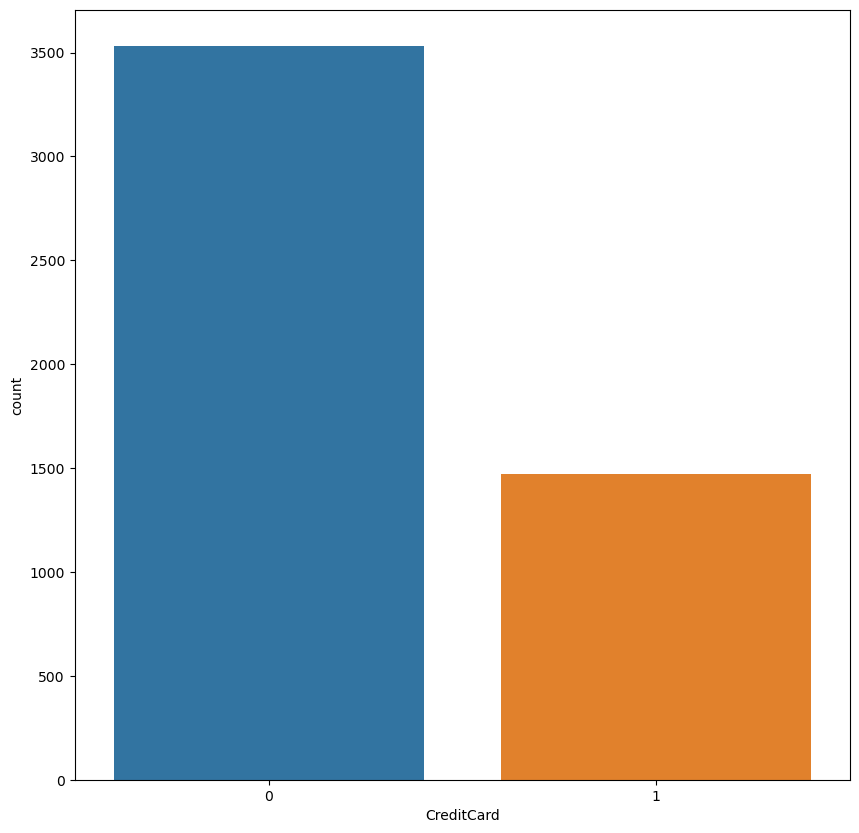

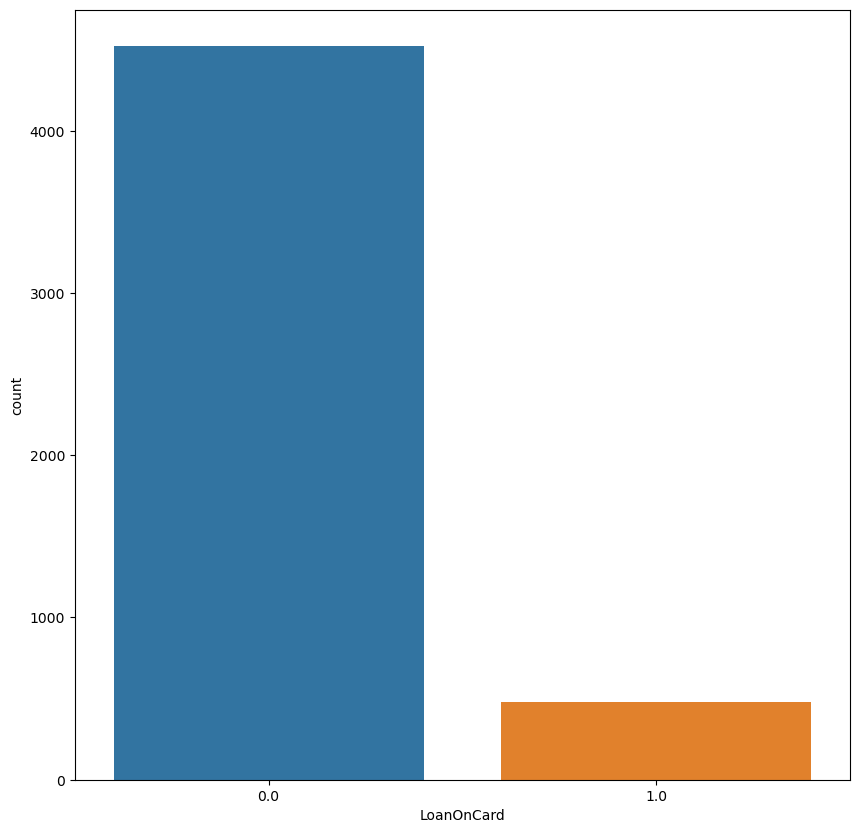

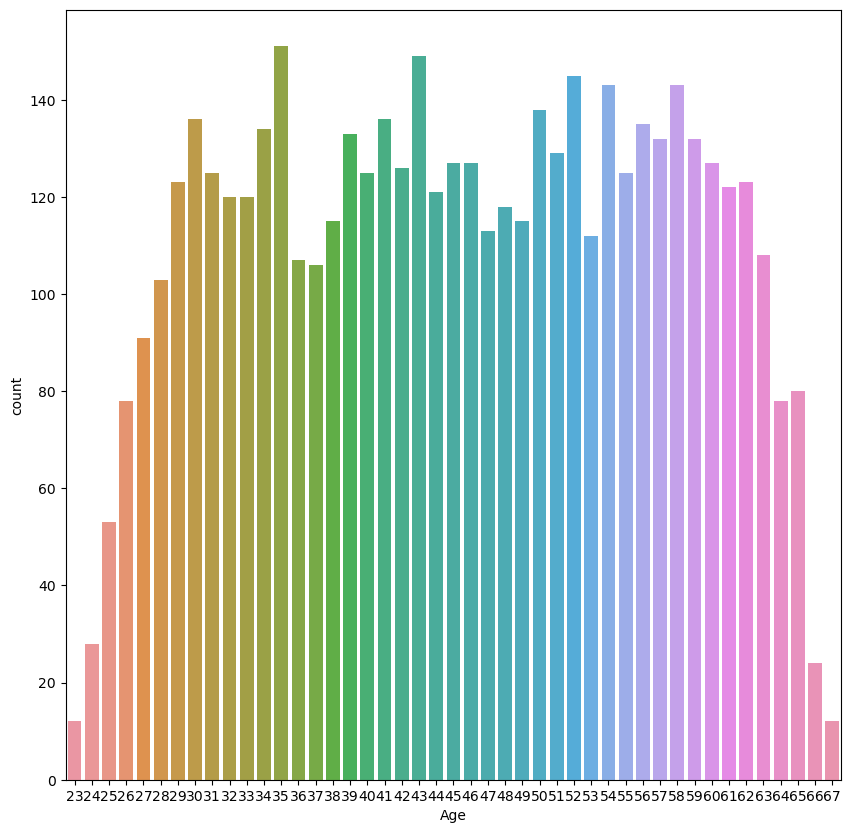

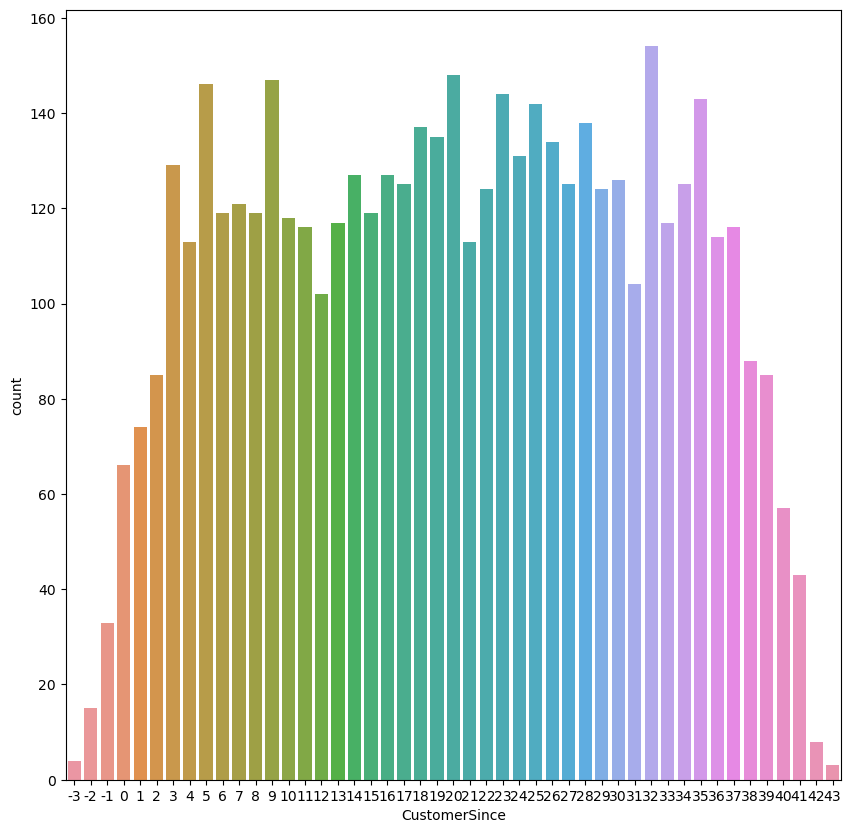

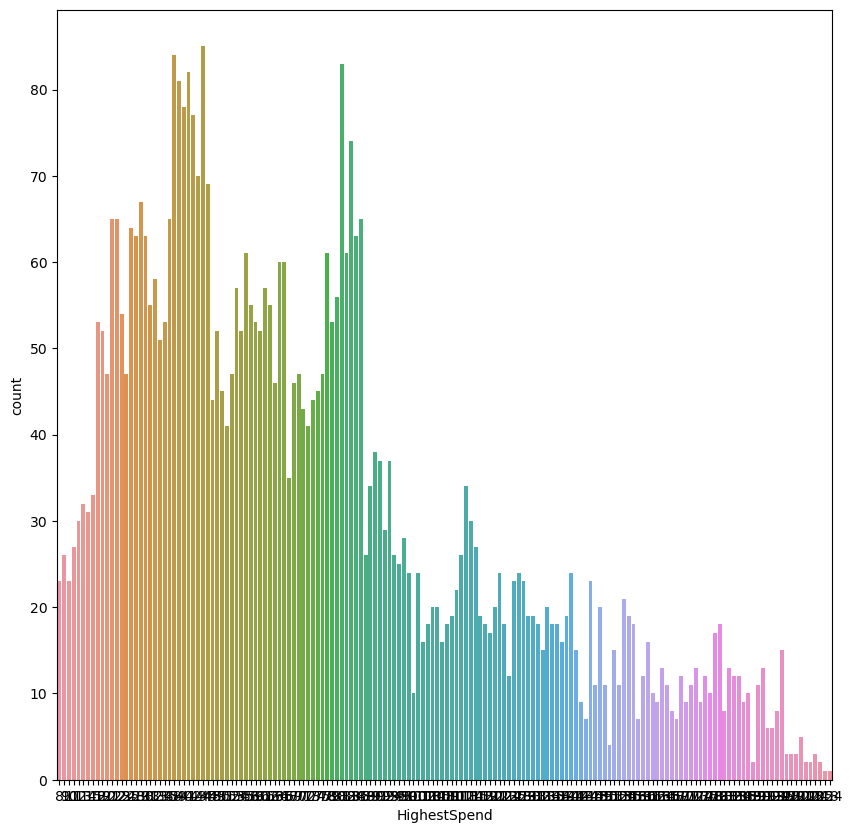

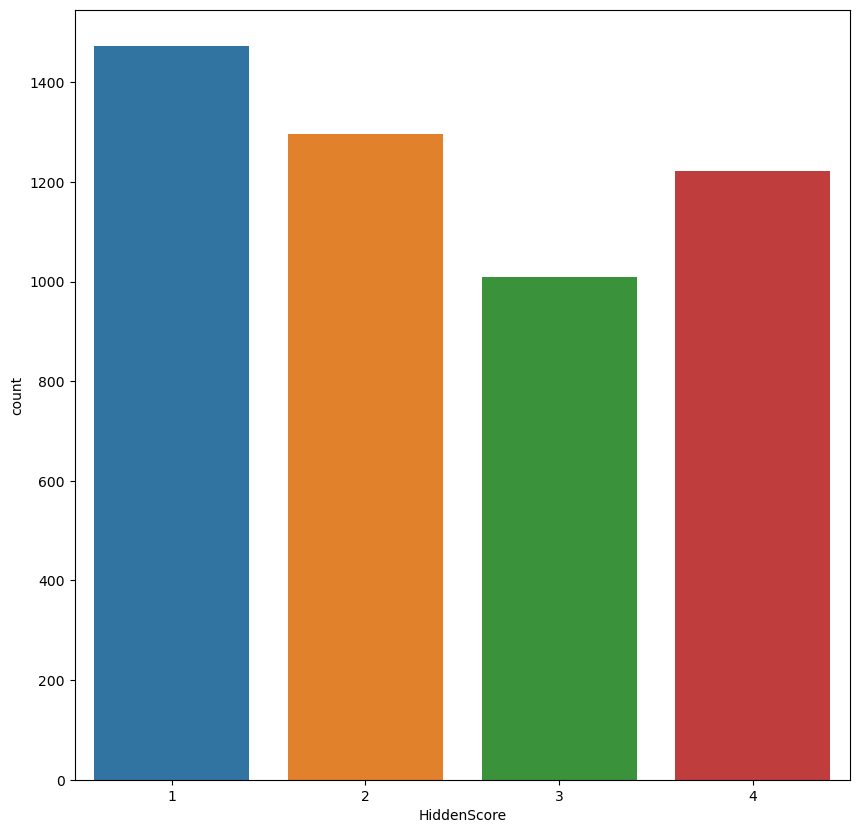

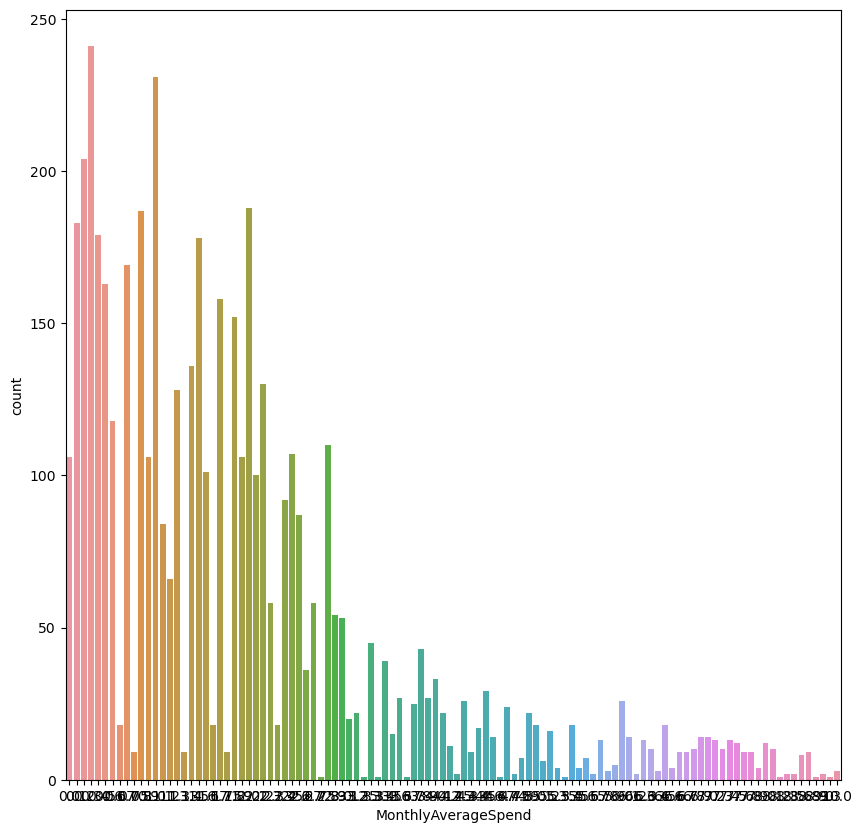

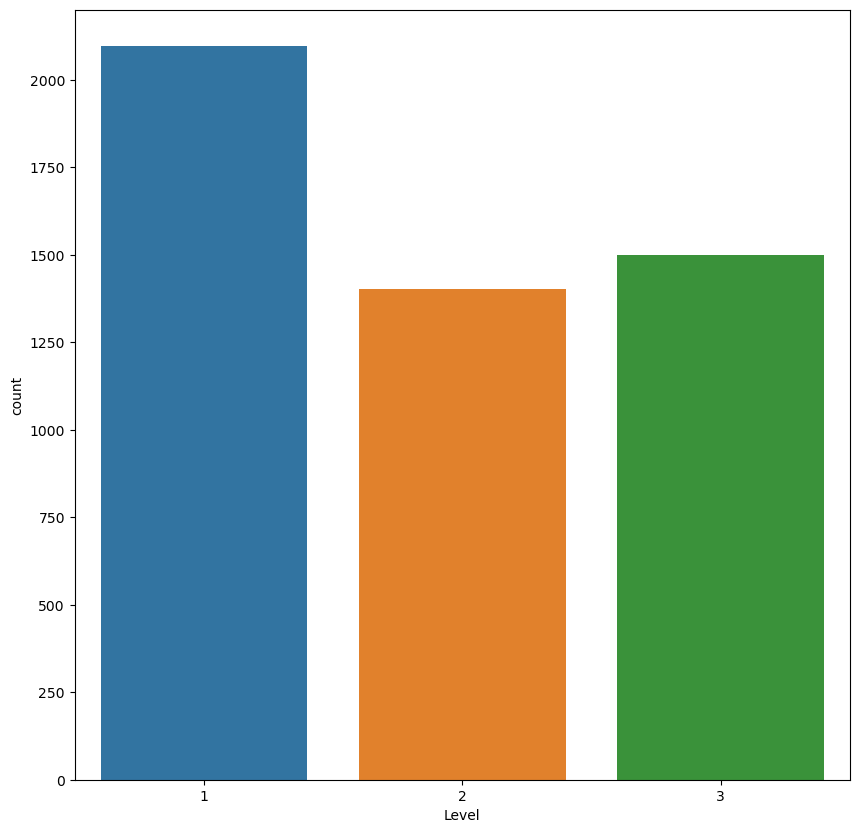

In [16]:
for i in data.columns:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i, data=data)
    plt.show()

From the above visualisation we observe that,

1.Majority of people don't have security(i.e 4000+).

2.Majority of people don't have FixedDepositAccount(i.e 4000+)

3.Almost 3000 people have InternetBanking.

4.3500 people don,t have Creditcard.

5.4000+ people don't have Loanoncard.

6.Hidden Score count for each category,

a)1 count is 1400+ 

b)2 count is 1200+

c)3 count is 1000 

d)4 is 1200

7)Level count for each category,

a)1 count is 2000+.

b)2 count is 1250+.

c)3 xount is 1500.

### Box Plot

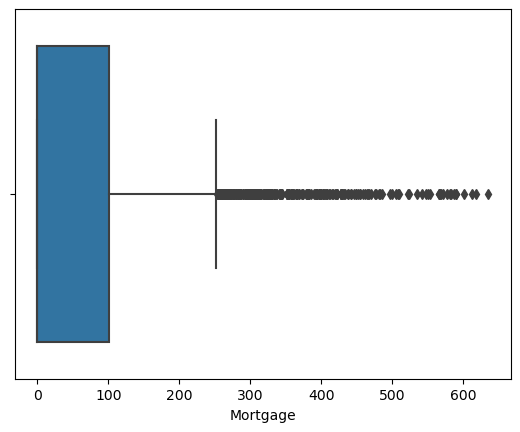

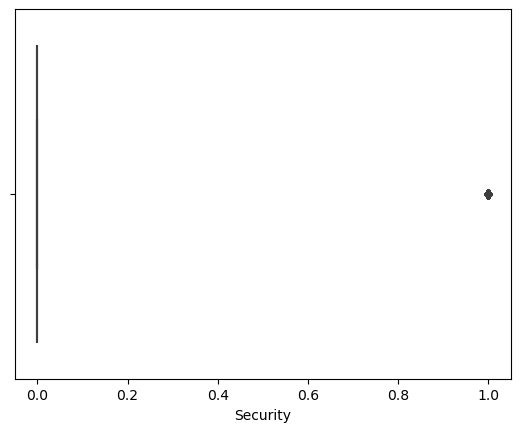

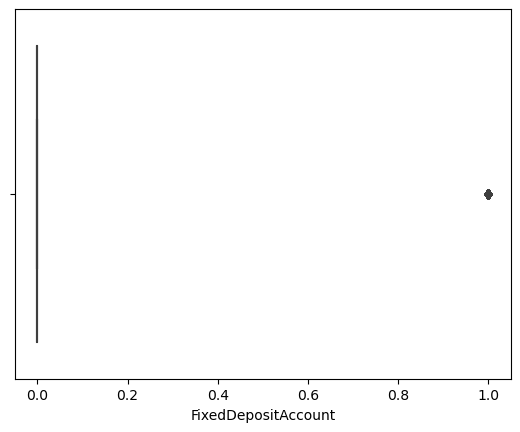

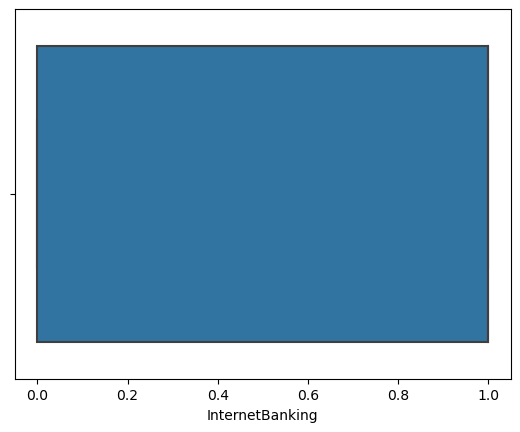

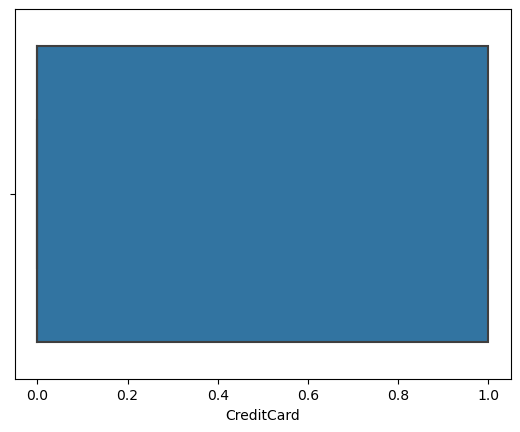

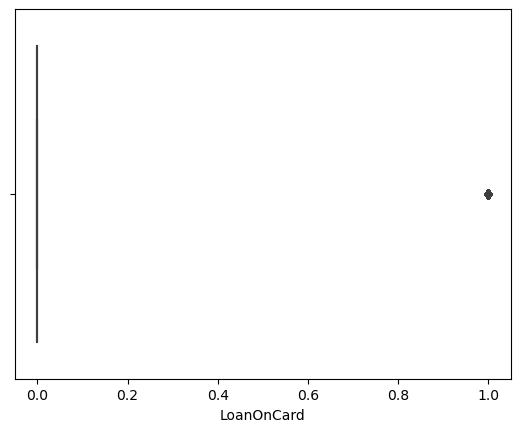

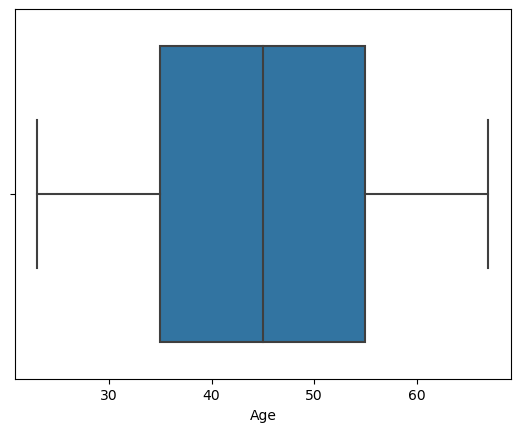

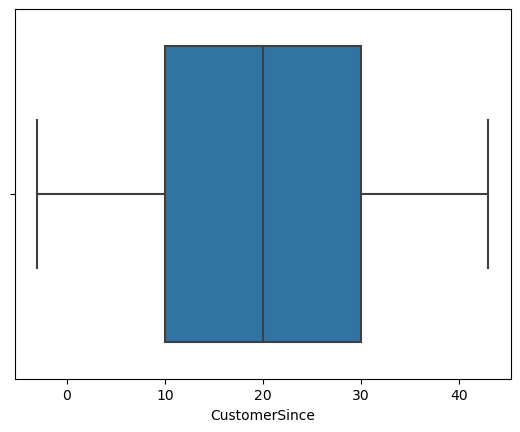

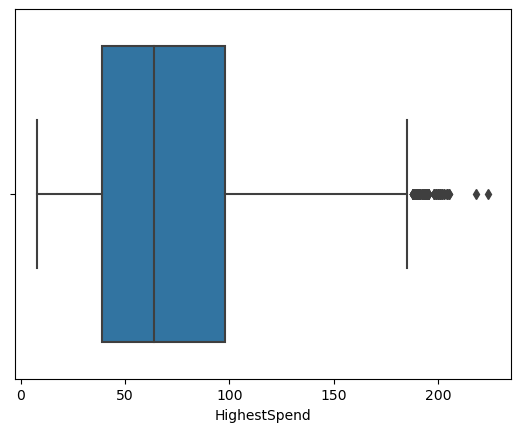

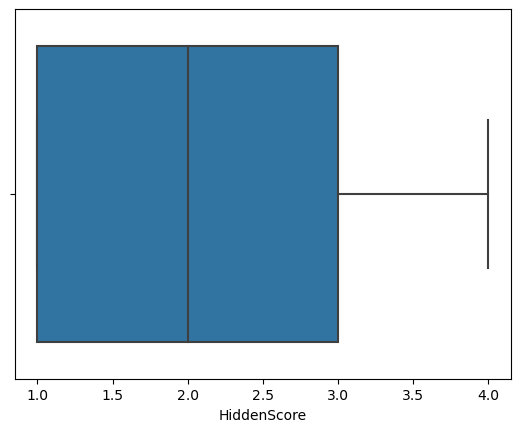

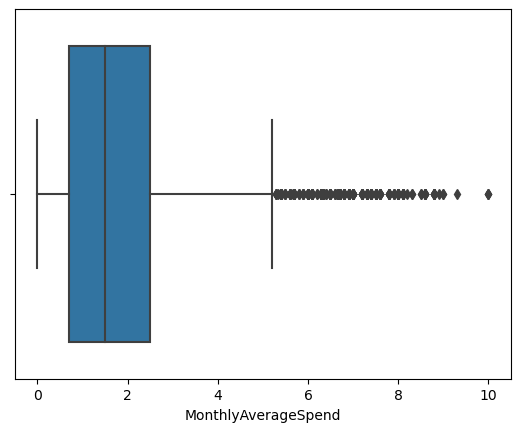

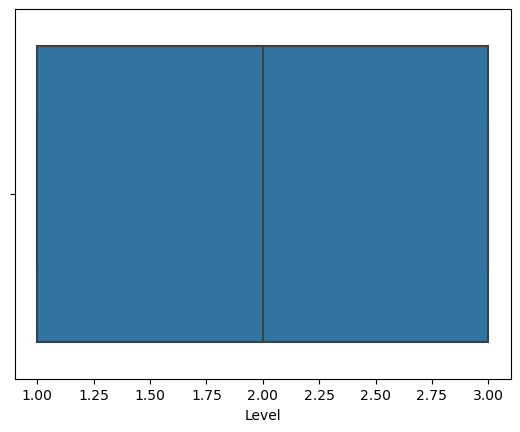

In [17]:
#plotting boxplot for each feature
for i in data.columns:
    sns.boxplot(data[i])
    plt.xlabel(i)
    plt.show()

From the above visualisation we observe that,

1.Mortgage,HighestSpend,MonthlyAverageSpend has outliers.


### Hist Plot

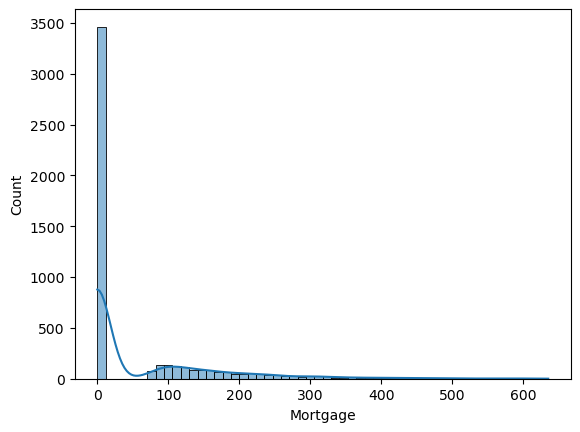

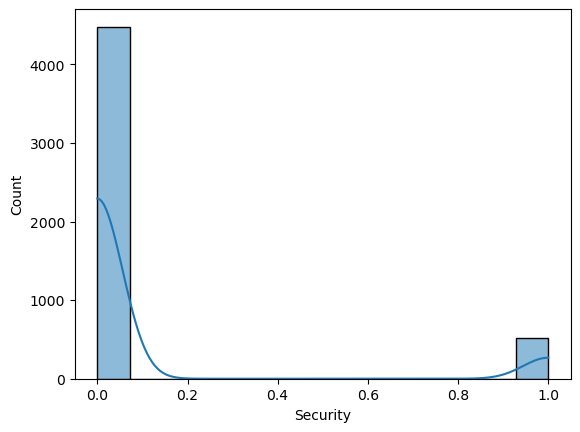

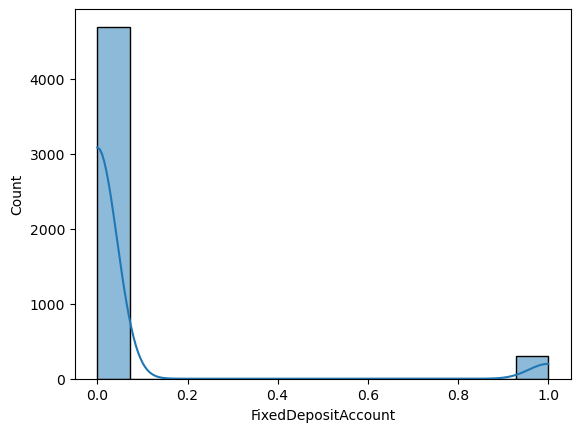

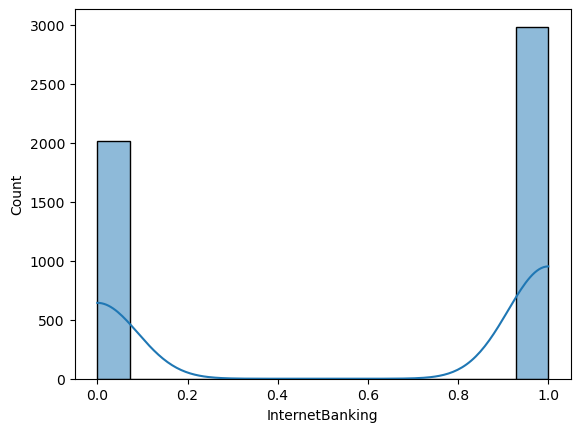

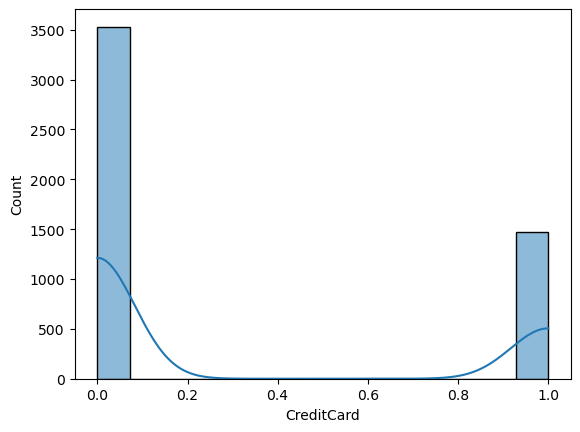

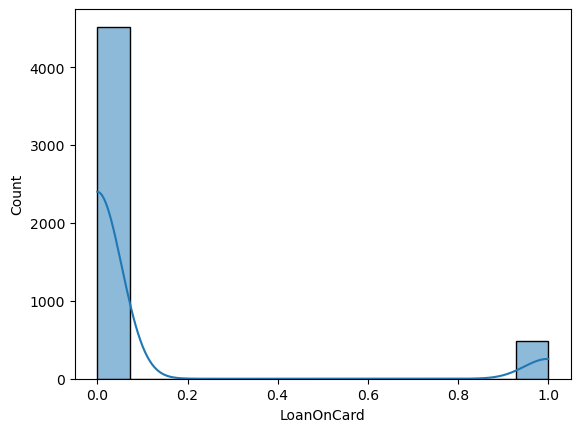

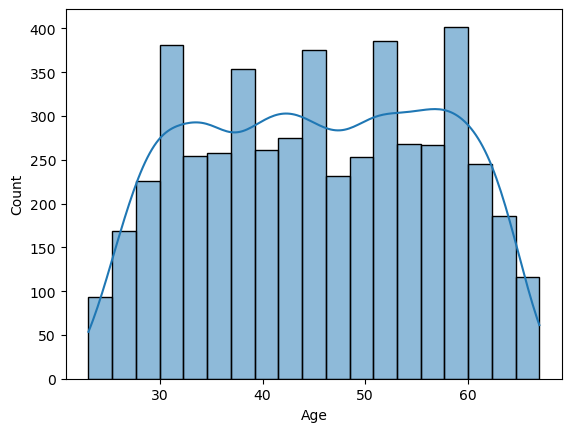

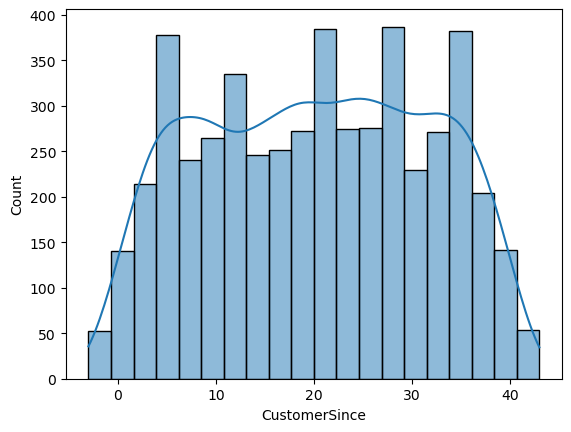

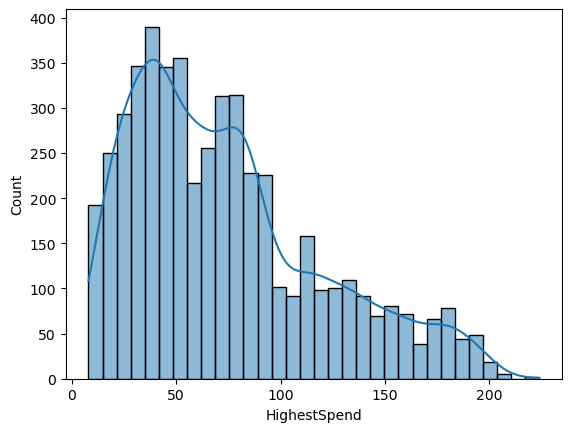

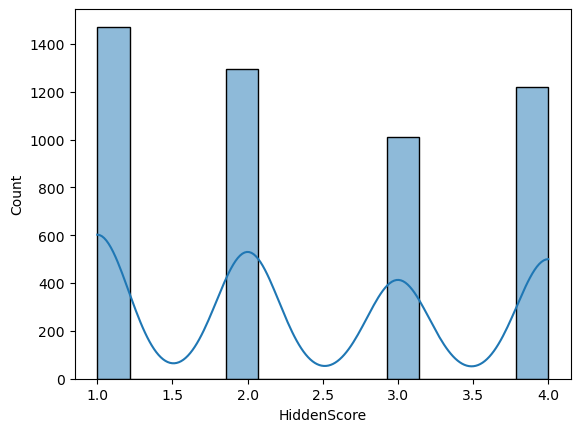

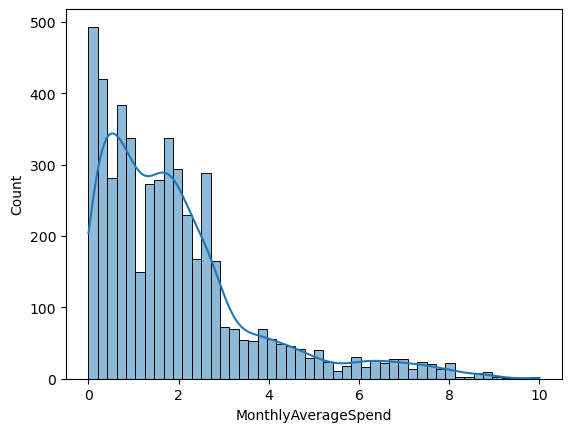

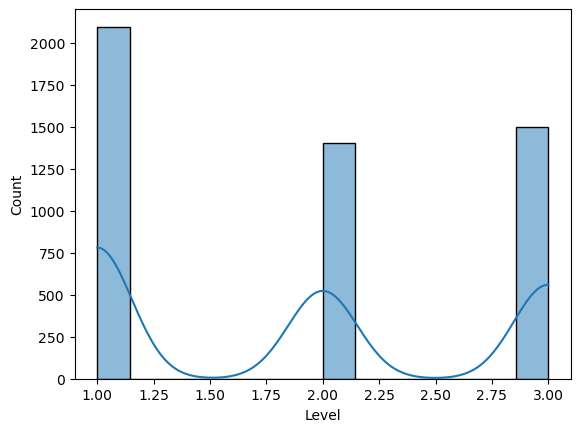

In [18]:
#plotting histplot for each feature
for i in data.columns:
    sns.histplot(data[i],kde=True)
    plt.show()

In [19]:
#checking unique values in each feature
for i in data.columns:
    print("\n")
    print(i)
    print(data[i].unique())



Mortgage
[  0 155 104 134 111 260 163 159  97 122 193 198 285 412 153 211 207 240
 455 112 336 132 118 174 126 236 166 136 309 103 366 101 251 276 161 149
 188 116 135 244 164  81 315 140  95  89  90 105 100 282 209 249  91  98
 145 150 169 280  99  78 264 113 117 325 121 138  77 158 109 131 391  88
 129 196 617 123 167 190 248  82 402 360 392 185 419 270 148 466 175 147
 220 133 182 290 125 124 224 141 119 139 115 458 172 156 547 470 304 221
 108 179 271 378 176  76 314  87 203 180 230 137 152 485 300 272 144  94
 208 275  83 218 327 322 205 227 239  85 160 364 449  75 107  92 187 355
 106 587 214 307 263 310 127 252 170 265 177 305 372  79 301 232 289 212
 250  84 130 303 256 259 204 524 157 231 287 247 333 229 357 361 294  86
 329 142 184 442 233 215 394 475 197 228 297 128 241 437 178 428 162 234
 257 219 337 382 397 181 120 380 200 433 222 483 154 171 146 110 201 277
 268 237 102  93 354 195 194 238 226 318 342 266 114 245 341 421 359 565
 319 151 267 601 567 352 284 199  80 334

## Min Max Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
cols=['Mortgage','Age','CustomerSince','HighestSpend','MonthlyAverageSpend']
scaler=MinMaxScaler()
for i in cols:
#for i in data.columns:
    data[i]=scaler.fit_transform(data[[i]])

In [21]:
data.head()

Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0       0.0         1                    0                0           0   
1       0.0         1                    0                0           0   
2       0.0         0                    0                0           0   
3       0.0         0                    0                0           0   
4       0.0         0                    0                0           1   

   LoanOnCard       Age  CustomerSince  HighestSpend  HiddenScore  \
0         0.0  0.045455       0.086957      0.189815            4   
1         0.0  0.500000       0.478261      0.120370            3   
2         0.0  0.363636       0.391304      0.013889            1   
3         0.0  0.272727       0.260870      0.425926            1   
4         0.0  0.272727       0.239130      0.171296            4   

   MonthlyAverageSpend  Level  
0                 0.16      1  
1                 0.15      1  
2                 0.10      1  
3                 0.27      2  
4                 0.10      2

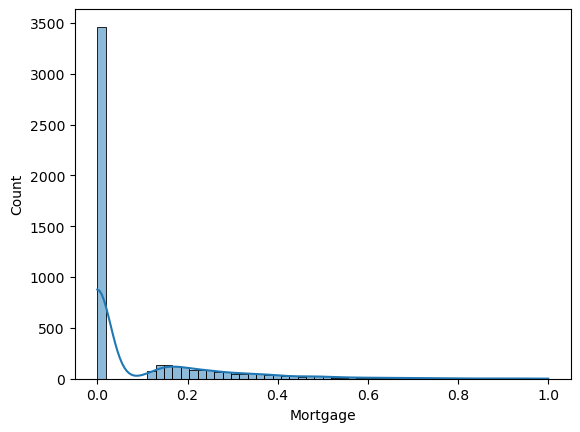

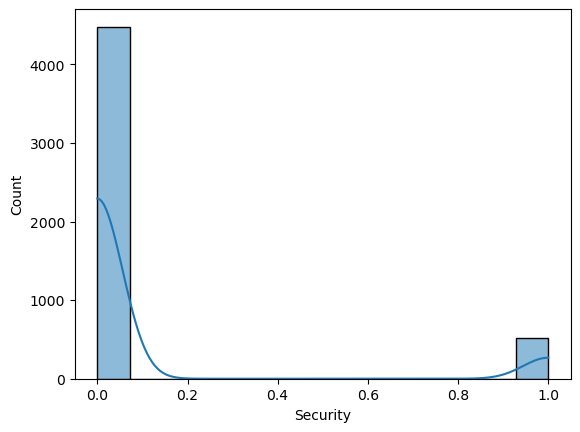

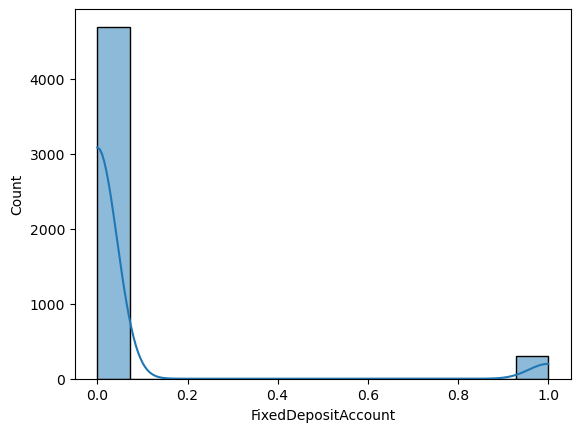

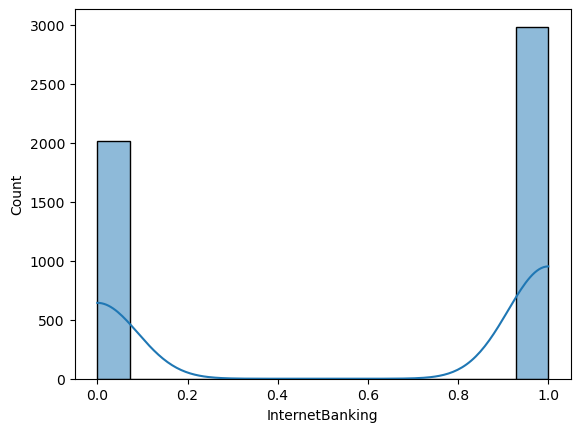

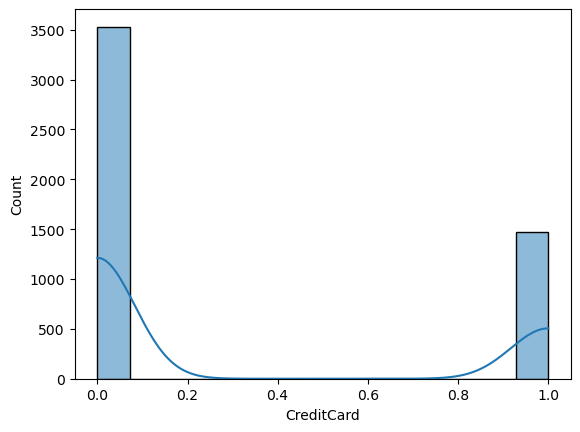

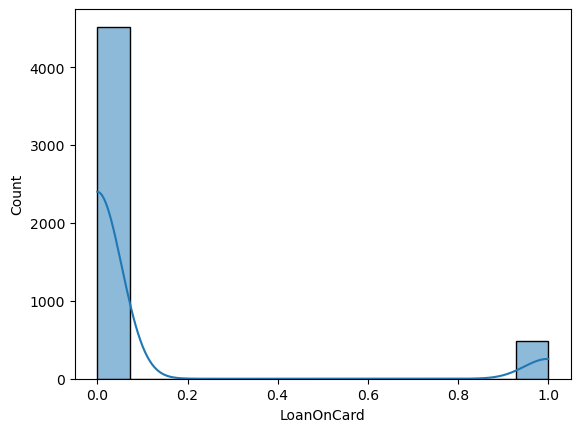

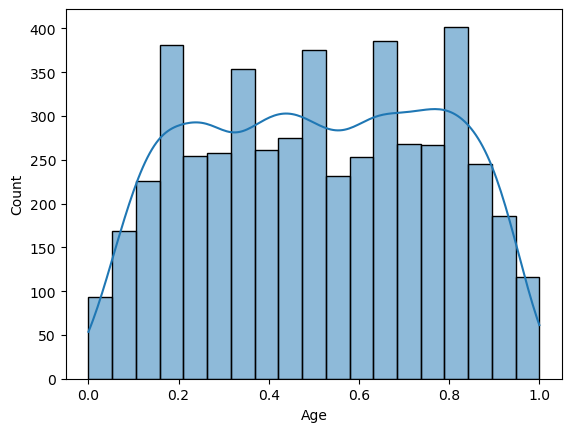

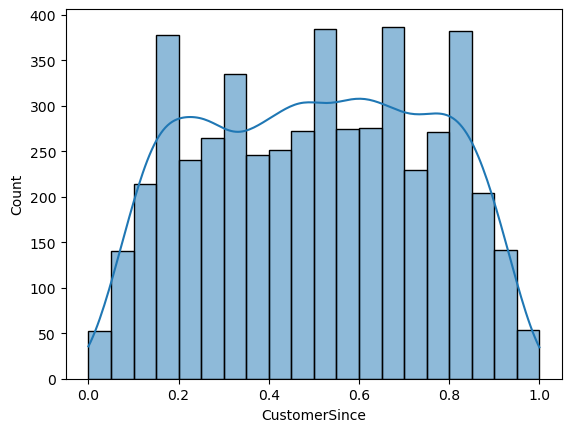

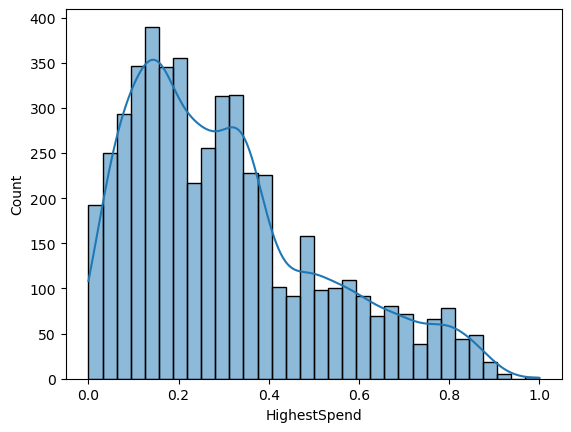

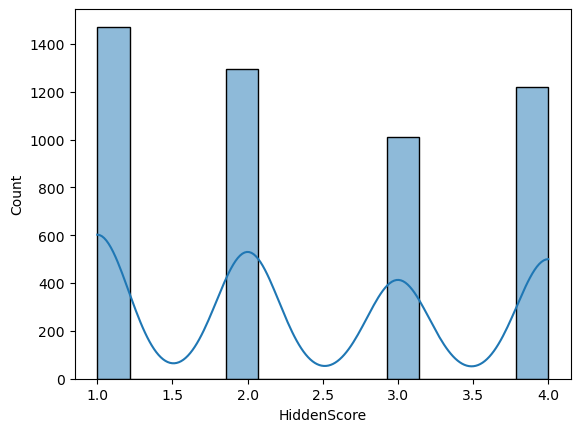

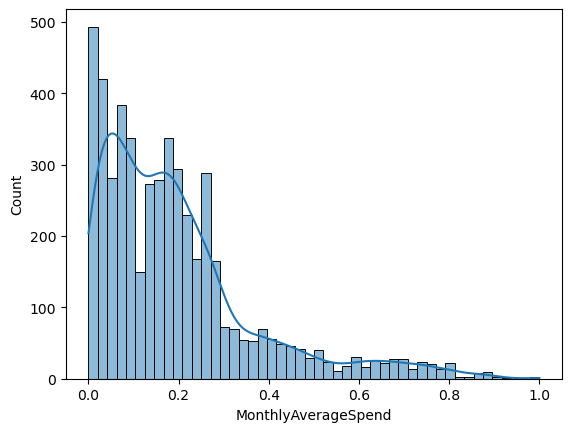

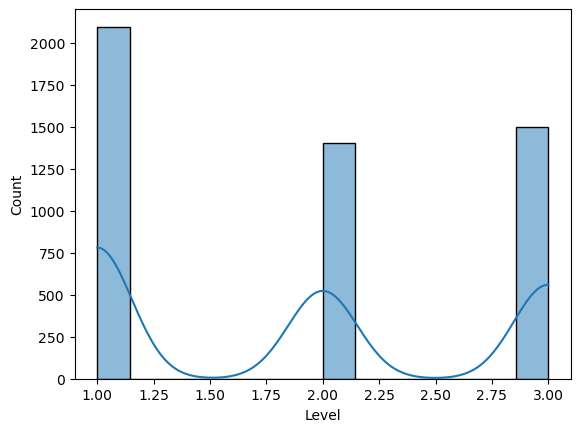

In [22]:
#plotting histplot for each feature
for i in data.columns:
    sns.histplot(data[i],kde=True)
    plt.show()

In [23]:
X=data.iloc[:,:-1]

In [24]:
X

Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0     0.000000         1                    0                0           0   
1     0.000000         1                    0                0           0   
2     0.000000         0                    0                0           0   
3     0.000000         0                    0                0           0   
4     0.000000         0                    0                0           1   
5     0.244094         0                    0                1           0   
6     0.000000         0                    0                1           0   
7     0.000000         0                    0                0           1   
8     0.163780         0                    0                1           0   
9     0.000000         0                    0                0           0   
10    0.000000         0                    0                0           0   
11    0.000000         0                    0                1           0   
12    0.000000         1                    0                0           0   
13    0.000000         0                    0                1           0   
14    0.000000         1                    0                0           0   
15    0.000000         0                    0                1           1   
16    0.211024         0                    0                0           0   
17    0.000000         0                    0                0           0   
18    0.000000         0                    0                0           0   
19    0.000000         1                    0                0           1   
20    0.174803         0                    0                1           0   
21    0.000000         0                    0                1           0   
22    0.409449         0                    0                1           0   
23    0.256693         1                    0                0           0   
24    0.250394         0                    0                0           1   
25    0.152756         0                    0                1           0   
26    0.000000         0                    0                0           0   
27    0.000000         0                    0                1           1   
28    0.000000         0                    0                1           1   
29    0.000000         0                    1                1           1   
30    0.192126         0                    0                1           0   
31    0.000000         0                    0                1           0   
32    0.303937         0                    0                0           0   
33    0.000000         0                    0                0           0   
34    0.000000         0                    0                1           0   
35    0.000000         0                    0                0           0   
36    0.000000         0                    0                0           1   
37    0.311811         0                    0                0           0   
38    0.000000         1                    1                1           0   
39    0.448819         0                    0                1           0   
40    0.000000         1                    0                0           0   
41    0.000000         0                    0                0           0   
42    0.648819         0                    0                1           0   
43    0.000000         0                    0                1           0   
44    0.000000         0                    0                1           1   
45    0.000000         0                    0                0           1   
46    0.240945         0                    0                1           0   
47    0.332283         1                    1                1           1   
48    0.000000         0                    0                0           1   
49    0.000000         0                    0                0           1   
50    0.000000         1    

In [25]:
y=data.iloc[:,-1]

In [26]:
y

0       1
1       1
2       1
3       2
4       2
5       2
6       2
7       3
8       2
9       3
10      3
11      2
12      3
13      2
14      1
15      3
16      3
17      1
18      3
19      2
20      2
21      3
22      1
23      1
24      1
25      1
26      3
27      1
28      3
29      2
30      3
31      2
32      3
33      3
34      3
35      1
36      1
37      3
38      3
39      3
40      3
41      1
42      2
43      1
44      1
45      1
46      2
47      3
48      3
49      1
50      2
51      1
52      1
53      3
54      3
55      1
56      2
57      3
58      1
59      1
60      2
61      1
62      1
63      2
64      1
65      1
66      1
67      3
68      1
69      1
70      1
71      2
72      1
73      3
74      1
75      2
76      3
77      2
78      3
79      1
80      1
81      2
82      3
83      2
84      3
85      3
86      2
87      1
88      1
89      3
90      2
91      3
92      2
93      3
94      1
95      3
96      1
97      1
98      1
99      3


from sklearn.feature_selection import SelectKBest, f_classif

# assuming X is the feature matrix and y is the target variable
selector = SelectKBest(score_func=f_classif, k='all') # instantiate SelectKBest
X_new = selector.fit_transform(X, y) # apply feature selection

# get the selected feature indices and corresponding scores
selected_indices = selector.get_support(indices=True)
scores = selector.scores_[selected_indices]


selected_indices

scores

data.head()

## Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.head()

Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
1522  0.403150         0                    0                0           1   
835   0.303937         0                    0                1           1   
358   0.000000         0                    0                1           0   
138   0.000000         1                    1                0           1   
299   0.000000         0                    1                1           0   

      LoanOnCard       Age  CustomerSince  HighestSpend  HiddenScore  \
1522         0.0  0.045455       0.043478      0.430556            4   
835          0.0  0.795455       0.782609      0.620370            2   
358          0.0  0.159091       0.195652      0.615741            2   
138          0.0  0.818182       0.804348      0.157407            3   
299          1.0  0.409091       0.391304      0.699074            1   

      MonthlyAverageSpend  
1522                0.230  
835                 0.390  
358                 0.433  
138                 0.150  
299                 0.550

In [29]:
y_train.head()

1522    3
835     1
358     1
138     1
299     3
Name: Level, dtype: int64

## Model Building

In [30]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
lst=[DecisionTreeClassifier(max_depth=9,criterion='gini'),RandomForestClassifier(max_depth=9,criterion='gini'),AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),KNeighborsClassifier()]
for i in lst:
    model=i.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(i)
    print(" ")
    print(accuracy_score(y_pred,y_test))
    print(classification_report(y_pred,y_test))
    print(f"{'_'*25} THE END  {'_'*25}")


DecisionTreeClassifier(max_depth=9)
 
0.5993939393939394
              precision    recall  f1-score   support

           1       0.67      0.72      0.69       651
           2       0.61      0.47      0.53       586
           3       0.49      0.59      0.54       413

    accuracy                           0.60      1650
   macro avg       0.59      0.59      0.59      1650
weighted avg       0.60      0.60      0.60      1650

_________________________ THE END  _________________________
RandomForestClassifier(max_depth=9)
 
0.6709090909090909
              precision    recall  f1-score   support

           1       0.78      0.76      0.77       723
           2       0.52      0.59      0.55       396
           3       0.65      0.61      0.63       531

    accuracy                           0.67      1650
   macro avg       0.65      0.65      0.65      1650
weighted avg       0.68      0.67      0.67      1650

_________________________ THE END  _________________________
Ad

In [57]:
model=DecisionTreeClassifier(max_depth=16,criterion='entropy').fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7848484848484848
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       687
           2       0.75      0.71      0.73       476
           3       0.75      0.76      0.75       487

    accuracy                           0.78      1650
   macro avg       0.78      0.77      0.78      1650
weighted avg       0.78      0.78      0.78      1650



In [93]:
model=RandomForestClassifier(max_depth=17,criterion='entropy',n_estimators=100,max_features='sqrt',min_samples_leaf=1).fit(X_train,y_train)
y_pred=model.predict(X_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

0.7757575757575758
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       714
           2       0.69      0.72      0.71       431
           3       0.76      0.74      0.75       505

    accuracy                           0.78      1650
   macro avg       0.76      0.77      0.76      1650
weighted avg       0.78      0.78      0.78      1650



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
import numpy as np

# Generate a random dataset for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Define the Random Forest model
rf = RandomForestClassifier()

# Create a GridSearchCV object with the parameter grid and the Random Forest model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best parameters and the corresponding mean cross-validated score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", np.round(grid_search.best_score_, 3))
